# Homework: Classification

### Dataset
In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

### Data preparation
- Check if the missing values are presented in the features.
- If there are missing values:
    - For categorical features, replace them with 'NA'
    - For numerical features, replace with 0.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [6]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [7]:
df[categorical] = df[categorical].fillna('NA')
df[numerical] = df[numerical].fillna(0)

### Question 1
What is the most frequent observation (mode) for the column industry?
- `NA`
- `technology`
- `healthcare`
- `retail`

In [8]:
df.industry.value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

In [9]:
df.industry.mode()

0    retail
Name: industry, dtype: object

The most frequent observation (mode) for the column industry is `retail`

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?
- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `lead_score`

In [10]:
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


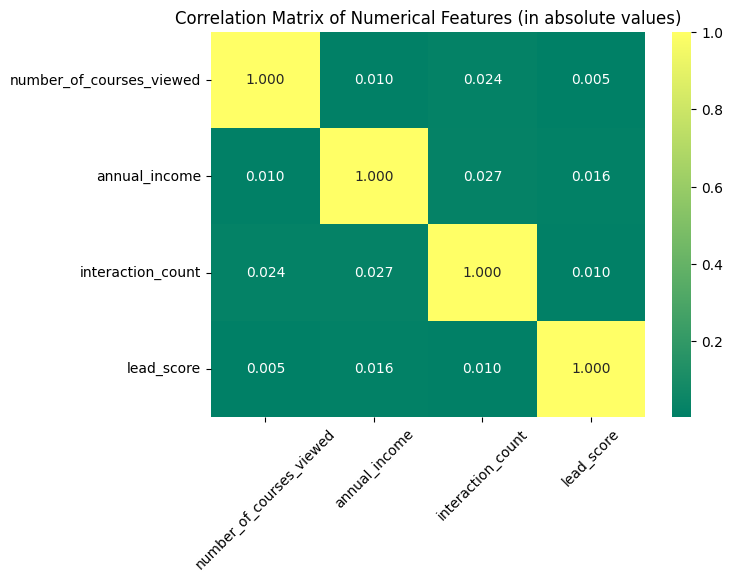

In [11]:
plt.figure(figsize=(7, 5))
sns.heatmap(abs(df[numerical].corr()), annot=True, cmap='summer', fmt=".3f")
plt.title('Correlation Matrix of Numerical Features (in absolute values)')
plt.xticks(rotation=45)
plt.show()

The two features that have the biggest correlation from the question list are `number_of_courses_viewed` and `interaction_count`

### Split the data
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
- Make sure that the target value `y` is not in your dataframe.

In [12]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [13]:
df_train.shape, df_val.shape, df_test.shape

((876, 9), (293, 9), (293, 9))

In [14]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [15]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 3
- Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?
- `industry`
- `location`
- `lead_source`
- `employment_status`

In [16]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_mi = df_train[categorical].apply(calculate_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.04
industry,0.01
employment_status,0.01
location,0.00


The variable that has the biggest mutual information score is `lead_source`

### Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?
- 0.64
- 0.74
- 0.84
- 0.94

In [17]:
train_dict = df_train.to_dict(orient='records')

In [18]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = (y_val == y_pred).mean().round(2)

print(f'The accuracy on the validation dataset: {accuracy}')

The accuracy on the validation dataset: 0.7


### Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
- `industry`
- `employment_status`
- `lead_score`
  
Note: The difference doesn't have to be positive.

In [21]:
features = list(df_train.columns)
features

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score']

In [22]:
score_all = accuracy
df_scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = (y_pred == y_val).mean()

    df_scores.loc[len(df_scores)] = [feature, score, score_all - score]

In [23]:
df_scores.sort_values(by='difference', key=abs)

,eliminated_feature,accuracy,difference
1,industry,0.699659,0.000341
0,lead_source,0.703072,-0.003072
4,employment_status,0.696246,0.003754
7,lead_score,0.706485,-0.006485
5,location,0.709898,-0.009898
2,number_of_courses_viewed,0.556314,0.143686
6,interaction_count,0.556314,0.143686
3,annual_income,0.853242,-0.153242


The feature with the smallest difference is `industry`